## Python Workshop Series: Pandas
#### Chris McCray - 29 March 2019

* There are many ways to read CSV data. Python's standard library includes the "csv" package
* "Pandas" (https://pandas.pydata.org/) is one of the key packages in scientific Python and data science
* Pandas makes reading CSVs easy, handles missing data well, and allows for quick calculations and plotting
* A Pandas dataframe is like an Excel spreadsheet, but much faster and more flexible


If you installed with anaconda, you should already have pandas

If you don't have it, run 
"conda install pandas"

In [1]:
import pandas as pd

We'll also need matplotlib for the plotting component of this workshop.

In [2]:
import matplotlib.pyplot as plt

Dictionaries are useful tools for mapping a data field (a key) with values
(Example inspired by https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96)

For more details on Pandas basics, see https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [3]:
my_dict = { 
     'name' : ["John", "Diane", "Joe", "Danielle", "Ashley", "Sam"],
     'age' : [20,55, 35, 40, 21, 35],
     'salary' : [41000,73000, 68000, 65000, 50000, 55000],
     'designation': ["VP", "CEO", "CFO", "VP", "VP", "VP"]
}

In [4]:
my_dict['age']

[20, 55, 35, 40, 21, 35]

In [5]:
my_dict

{'age': [20, 55, 35, 40, 21, 35],
 'designation': ['VP', 'CEO', 'CFO', 'VP', 'VP', 'VP'],
 'name': ['John', 'Diane', 'Joe', 'Danielle', 'Ashley', 'Sam'],
 'salary': [41000, 73000, 68000, 65000, 50000, 55000]}

But what if you want to get the designation for Employee Sam? There are several ways to do this, but most are not clean and straightforward

We can use **Pandas** for this. Pandas has two basic data structures:
* **Series**, which are one-dimensional labeled arrays, resembling dictionaries
* **DataFrame** (most commonly used) is 2-dimensional, like a spreadsheet, or a dictionary of Series 

In [8]:
employees = pd.DataFrame(my_dict)

In [9]:
employees

,age,designation,name,salary
0,20,VP,John,41000
1,55,CEO,Diane,73000
2,35,CFO,Joe,68000
3,40,VP,Danielle,65000
4,21,VP,Ashley,50000
5,35,VP,Sam,55000


Dataframes are made up of **rows** and **columns**. Each column has the same data type.

We can set a column (or multiple columns!) as the **index**

In [10]:
employees.set_index('name', inplace=True)
employees

,age,designation,salary
name,,,
John,20,VP,41000
Diane,55,CEO,73000
Joe,35,CFO,68000
Danielle,40,VP,65000
Ashley,21,VP,50000
Sam,35,VP,55000


In [11]:
print(employees.index)
print(employees.columns)

Index(['John', 'Diane', 'Joe', 'Danielle', 'Ashley', 'Sam'], dtype='object', name='name')
Index(['age', 'designation', 'salary'], dtype='object')


In [12]:
employees.loc['John']

age               20
designation       VP
salary         41000
Name: John, dtype: object

In [13]:
employees.iloc[3]

age               40
designation       VP
salary         65000
Name: Danielle, dtype: object

We can subset dataframes based on values of each column

In [14]:
#Employees where age > 30
employees[employees.age > 30]

,age,designation,salary
name,,,
Diane,55,CEO,73000
Joe,35,CFO,68000
Danielle,40,VP,65000
Sam,35,VP,55000


In [15]:
employees[employees['designation'] == 'VP']

,age,designation,salary
name,,,
John,20,VP,41000
Danielle,40,VP,65000
Ashley,21,VP,50000
Sam,35,VP,55000


We can easily set values or add new columns

In [16]:
employees.loc['John', 'age'] = 22

In [17]:
employees['city'] = 'Montreal'

In [18]:
employees

,age,designation,salary,city
name,,,,
John,22,VP,41000,Montreal
Diane,55,CEO,73000,Montreal
Joe,35,CFO,68000,Montreal
Danielle,40,VP,65000,Montreal
Ashley,21,VP,50000,Montreal
Sam,35,VP,55000,Montreal


In [19]:
employees.loc['Diane','city'] = 'Toronto'

In [20]:
employees

,age,designation,salary,city
name,,,,
John,22,VP,41000,Montreal
Diane,55,CEO,73000,Toronto
Joe,35,CFO,68000,Montreal
Danielle,40,VP,65000,Montreal
Ashley,21,VP,50000,Montreal
Sam,35,VP,55000,Montreal


With DataFrames, we can perform numerous math operations and get descriptive statistics easily 

In [21]:
employees.age.describe()

count     6.000000
mean     34.666667
std      12.564500
min      21.000000
25%      25.250000
50%      35.000000
75%      38.750000
max      55.000000
Name: age, dtype: float64

In [22]:
employees['age']+10

name
John        32
Diane       65
Joe         45
Danielle    50
Ashley      31
Sam         45
Name: age, dtype: int64

In [23]:
employees.designation.value_counts()

VP     4
CFO    1
CEO    1
Name: designation, dtype: int64

Pandas is extremely useful for working with **time series** and dates, as we'll see in a moment

In [24]:
pd.date_range('1/1/2019','1/12/2019')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12'],
              dtype='datetime64[ns]', freq='D')

Finally, visualization with **matplotlib** is very quick and easy!

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline

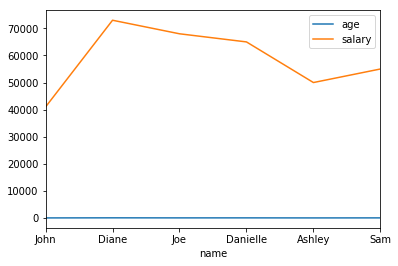

In [26]:
employees.plot()

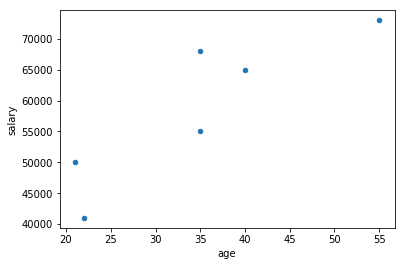

In [27]:
employees.plot.scatter(x='age',y='salary')


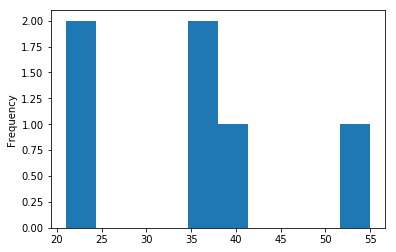

In [28]:
employees.age.plot.hist()
plt.show()

### Real-world dataset example:
#### We'll read in a CSV file that contains daily weather data from 1871-2019 from Environment and Climate Change Canada for the weather station located on the McTavish Reservoir (CWTA)

Note that this station has changed locations several times. It was located at the McGill Observatory, where Leacock now stands, until 1963. It was then located at various sites on the McGill lower campus until 1993 and on McTavish Reservoir from 1994-present. See details in my blog post (https://web.meteo.mcgill.ca/cmccray/climate-change-montreal-winter/#details) if you're interested.

In [29]:
mtl_weather = pd.read_csv('http://www.cdmccray.com/python_tutorial/pandas/montreal_daily_weather.csv')

/aos/home/cmccray/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
mtl_weather.shape

(49226, 28)

We can easily convert the date column to datetime objects

In [31]:
mtl_weather['Date/Time'] = pd.to_datetime(mtl_weather['Date/Time'])

In [34]:
mtl_weather['Date/Time'].dt.month

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
54391    12
54392    12
54393    12
54394    12
54395    12
54396    12
54397    12
54398    12
54399    12
54400    12
54401    12
54402    12
54403    12
54404    12
54405    12
54406    12
54407    12
54408    12
54409    12
54410    12
54411    12
54412    12
54413    12
54414    12
54415    12
54416    12
54417    12
54418    12
54419    12
54420    12
Name: Date/Time, Length: 54421, dtype: int64

Let's set our index to the date of observation

In [35]:
mtl_weather.set_index('Date/Time', inplace=True)

**Grouping** is one of the most powerful and useful features of Pandas

From the "10 minutes to Pandas" page:
By “group by” we are referring to a process involving one or more of the following steps:
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

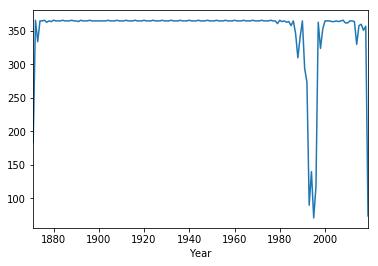

In [36]:
mtl_weather.groupby('Year').count()['Max Temp (°C)'].plot()

This takes all of the rows with the same value for "Year", and then applies the "count" function to them. 

Above, we've plotted the number of (**non-NaN**) Max Temp values for each year. "count" does not count missing/NaN values

Note that we can see there are several years in the 1990s with lots of missing data.

We can remove rows with missing data by using dropna.

In [37]:
mtl_weather.dropna()

,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,...,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,Date,season
Date/Time,,,,,,,,,,,,,,,,,,,,,


Notice that each row has a missing value for at least one of the fields. Let's only drop the rows without a Max Temperature value

In [38]:
mtl_weather.dropna(subset=['Max Temp (°C)'], inplace=True)

Now let's look at some more interesting features of this dataset. 

Let's calculate the average yearly temperature for each year to see if there's a trend:

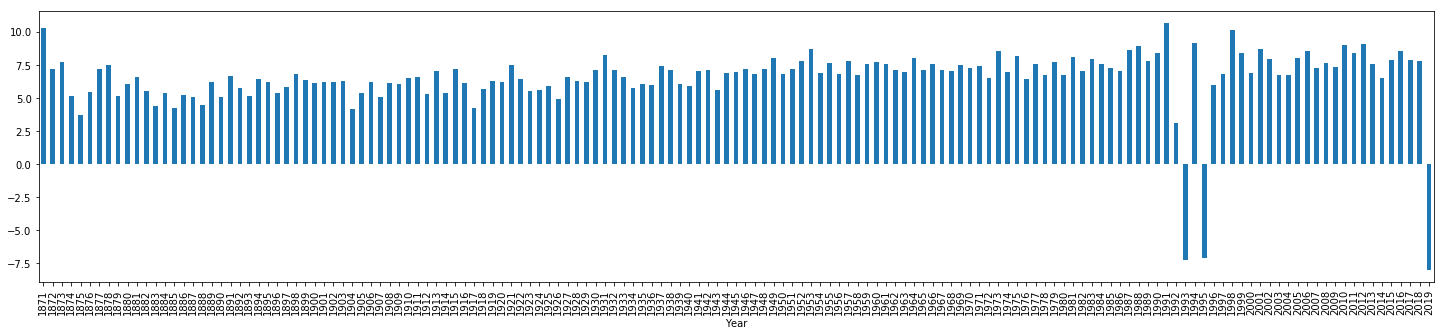

In [39]:
mtl_weather.groupby('Year').mean()['Mean Temp (°C)'].plot.bar(figsize=[25,5])
plt.show()

There are a few years where the average temperature is way below the other years. This is because those years have lots of missing values in parts of the year (evidently in the warmer parts). 
 
We can handle this by only looking at years with at least X number of observations.

In [40]:
#Calculate the number of mean temperature observations in each year
yearly_counts = mtl_weather.groupby('Year').count()['Mean Temp (°C)']

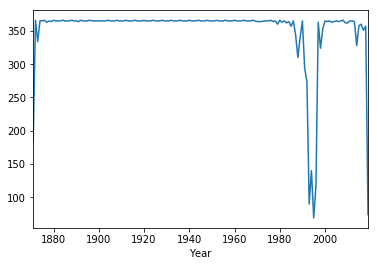

In [43]:
yearly_counts.plot()

Lets say our threshold for a year with a sufficient amount of data is 350 days

In [44]:
good_years = yearly_counts[yearly_counts>350].index

In [45]:
good_years

Int64Index([1872, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
            ...
            2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year', length=135)

Subset the dataframe to include ONLY data from our "good years"

In [48]:
mtl_weather = mtl_weather[mtl_weather.Year.isin(good_years)]

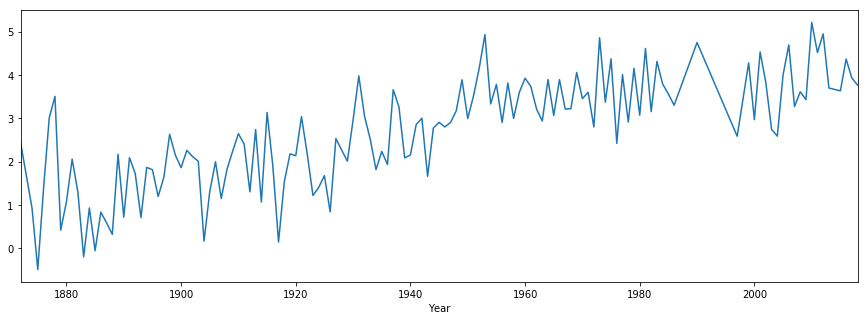

In [53]:
mtl_weather.groupby('Year').mean()['Min Temp (°C)'].plot(figsize=[15,5])
plt.show()

We can now easily get extreme values and other stats of the dataset

In [56]:
mtl_weather['Min Temp (°C)'].nsmallest(10)

Date/Time
1933-12-29   -33.9
1981-01-04   -33.5
1943-02-15   -33.3
1914-01-13   -32.8
1914-02-11   -32.8
1933-12-30   -32.8
1882-01-24   -32.2
1887-01-09   -32.2
1914-02-12   -32.2
1879-12-21   -31.7
Name: Min Temp (°C), dtype: float64

In [57]:
mtl_weather['Max Temp (°C)'].nlargest(10)

Date/Time
2018-07-02    36.6
1931-07-01    36.1
1917-08-01    35.6
1955-07-22    35.6
1975-08-01    35.6
2002-08-14    35.4
2001-08-08    35.3
1911-07-03    35.0
1921-07-08    35.0
1931-07-02    35.0
Name: Max Temp (°C), dtype: float64

In [59]:
mtl_weather.describe()

,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),season
count,49226.000000,49226.000000,49226.000000,0.0,49226.000000,49215.000000,49215.000000,49215.000000,49215.000000,41958.000000,41949.000000,48913.000000,12384.000000,1992.000000,49226.000000
mean,1941.422480,6.522468,15.725287,NaN,10.807128,2.680293,6.753986,12.040049,0.794034,2.111869,0.736919,2.901108,10.154797,20.743474,1941.841385
std,41.283202,3.448537,8.799889,NaN,12.444379,11.722607,11.986670,11.006062,1.850957,5.781769,2.854098,6.503921,19.577769,11.753323,41.286312
min,1872.000000,1.000000,1.000000,NaN,-28.900000,-33.900000,-31.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1872.000000
25%,1906.000000,4.000000,8.000000,NaN,1.100000,-6.100000,-2.500000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1907.000000
50%,1940.000000,7.000000,16.000000,NaN,11.700000,3.800000,7.700000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500000,1940.000000
75%,1974.000000,10.000000,23.000000,NaN,21.700000,12.800000,17.300000,20.500000,0.000000,0.800000,0.000000,2.500000,10.000000,33.000000,1974.000000
max,2018.000000,12.000000,31.000000,NaN,36.600000,26.100000,30.300000,49.400000,12.300000,90.400000,46.500000,94.700000,145.000000,36.000000,2019.000000


Since our dataframe has datetime objects as in the index, we can quickly calculate things like rolling averages

Let's just look at 2018

In [76]:
mtl_2018 = mtl_weather[mtl_weather.Year==2018]

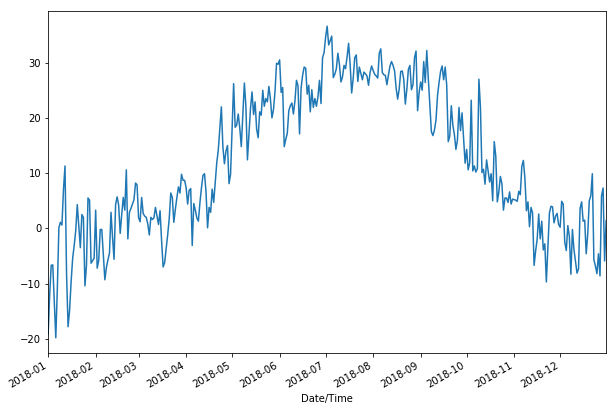

In [83]:
mtl_2018['Max Temp (°C)'].plot(figsize=[10,7])

In [106]:
'''
Calculates a centered running mean Max Temperature for 14, 30, and 90 day windows 
Require at least 10 days of data to calculate the running mean
'''
rolling_mean_14 = mtl_2018['Max Temp (°C)'].rolling(window=14, min_periods=10,center=True).mean()
rolling_mean_30 = mtl_2018['Max Temp (°C)'].rolling(window=30, min_periods=10,center=True).mean()
rolling_mean_90 = mtl_2018['Max Temp (°C)'].rolling(window=90, min_periods=10,center=True).mean()

Now we'll plot the rolling average and the point data together

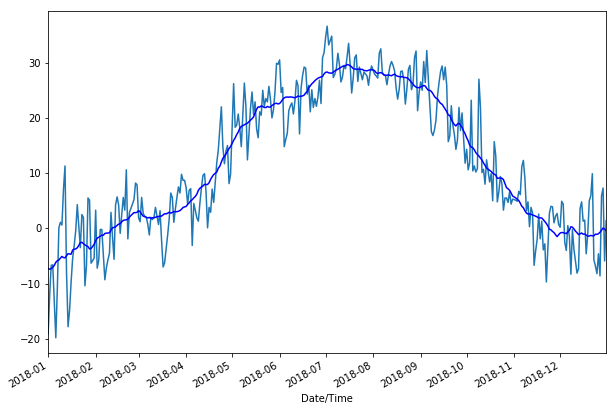

In [110]:
mtl_2018['Max Temp (°C)'].plot(figsize=[10,7])
rolling_mean_30.plot(color='blue')
#rolling_mean_14.plot(color='red')
#rolling_mean_90.plot(color='purple')


## Exercise 1
#### Calculate the warmest and coldest temperatures observed each year

## Exercise 2
#### Calculate and plot the average January minimum temperature for each year (in one line!)

## Exercise 3
#### Create a dataframe containing only data for March of each year

#### Now answer the question: How have March temperatures (average, max, min) changed from 1871 to today?